<a href="https://colab.research.google.com/github/fredymendezbustamante/MODELADO_Y_SIMULACION-/blob/master/modelado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!collapse=True 
!pip install pynamical
#!pip install fractal
!pip install vispy

# Importando las librerías que vamos a utilizar
import pandas as pd
import numpy as np
#from fractal import Fern, Lorentz
from pynamical import simulate, bifurcation_plot, phase_diagram, phase_diagram_3d
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')

# graficos incrustados
%matplotlib inline

In [39]:
# modelo logistico para 20 generaciones con 7 tasas de crecimiento entre 0.5 y 3.5.
poblacion = simulate(num_gens=20, rate_min=0.5, rate_max=3.5, num_rates=8)
poblacion.applymap(lambda x: '{:03.3f}'.format(x))

,0.500000,0.928571,1.357143,1.785714,2.214286,2.642857,3.071429,3.500000
0,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500
1,0.125,0.232,0.339,0.446,0.554,0.661,0.768,0.875
2,0.055,0.166,0.304,0.441,0.547,0.592,0.547,0.383
3,0.026,0.128,0.287,0.440,0.549,0.638,0.761,0.827
4,0.013,0.104,0.278,0.440,0.548,0.610,0.559,0.501
5,0.006,0.086,0.272,0.440,0.548,0.629,0.757,0.875
6,0.003,0.073,0.269,0.440,0.548,0.617,0.565,0.383
7,0.002,0.063,0.267,0.440,0.548,0.625,0.755,0.827
8,0.001,0.055,0.265,0.440,0.548,0.620,0.568,0.501
9,0.000,0.048,0.265,0.440,0.548,0.623,0.754,0.875


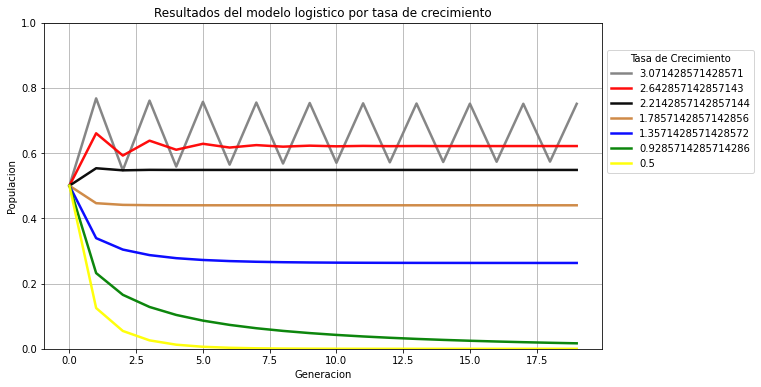

In [28]:
# Graficando los resultados
colores = ['yellow', 'green', 'blue', 'peru', 'black', 'red', 'grey']
for color, tasa in reversed(list(zip(colores, poblacion.columns))):
    ax = poblacion[tasa].plot(kind='line', figsize=[10, 6], linewidth=2.5, alpha=0.95, c=color)
ax.grid(True)
ax.set_ylim([0, 1])
ax.legend(title='Tasa de Crecimiento', loc=3, bbox_to_anchor=(1, 0.525))
ax.set_title('Resultados del modelo logistico por tasa de crecimiento')
ax.set_xlabel('Generacion')
ax.set_ylabel('Populacion')

plt.show()

python3: can't open file 'bifurcation_zoom.py': [Errno 2] No such file or directory


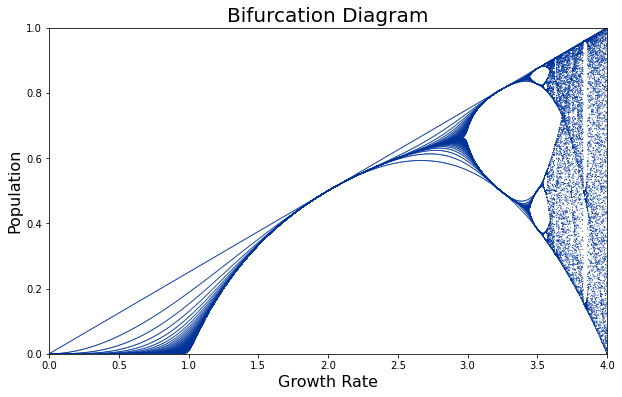

In [29]:
!python bifurcation_zoom.py
# Modelo con 100 generaciones haciendo crecer R en 1000 pasos.
pops = simulate(num_gens=100, rate_min=0, rate_max=4, num_rates=1000, num_discard=1)
#Graficando el diagrama de bifurcación
bifurcation_plot(pops)

In [59]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
def mapa(r,x):

    der = r*(1.-2.*x)
    return r*x*(1.-x), der

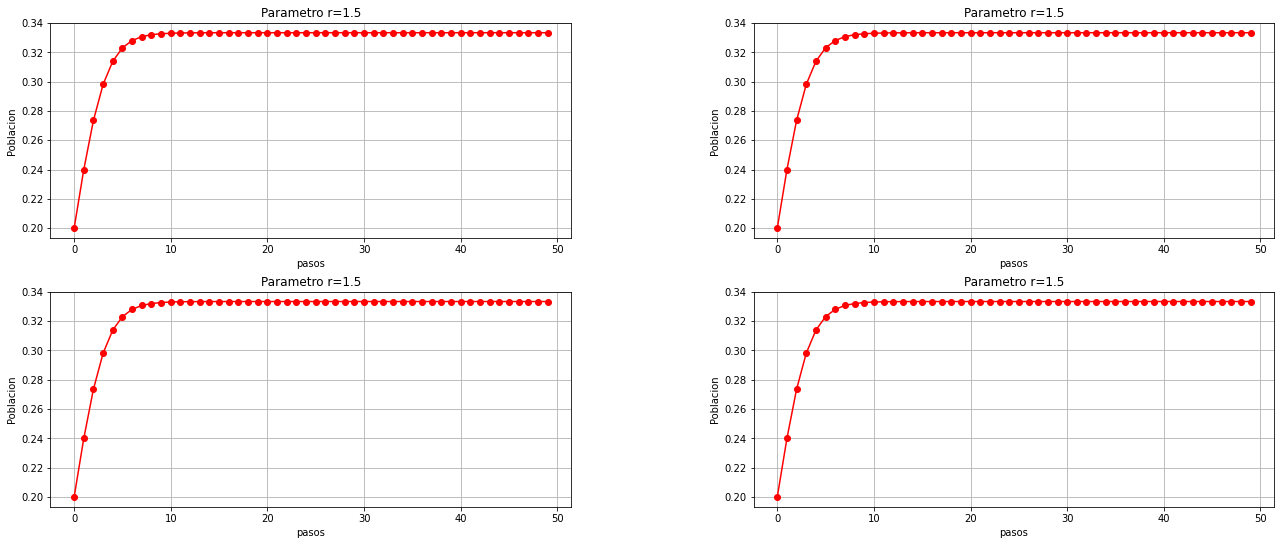

In [72]:
from matplotlib.ticker import NullFormatter
def lyap(r, x):
    xcp = x;
    acum = 0;
    der  = 0;
    (xcp,der)  = mapa(r,xcp)
    for i in range(100):
        if (der != 0.):
            acum = acum + np.log(np.abs(der));
        (xcp,der)  = mapa(r,xcp)

    return acum/100.


x      = 0.2 ;                           #input("Entra el valor de la poblacion inicial:     ")
r      = 1.5;                           # input("Entra el valor del parametro r:             ")
npasos = 50  ;                          #input("Entra el numero de generaciones a calcular: ")


xa=np.zeros(npasos)
xa[0]=x 
fig = go.Figure()
for i in range(0,npasos-1):
    (xa[i+1],foo) = mapa(r,xa[i]);

    (xa[i]);


plt.figure(figsize=(20,8))    
plt.subplot(221)
plt.xlabel("pasos")
plt.ylabel("Poblacion")
plt.title("Parametro r=" + str(r))
plt.grid(True)
plt.plot(xa, 'ro-')


plt.subplot(222)
plt.xlabel("pasos")
plt.ylabel("Poblacion")
plt.title("Parametro r=" + str(r))
plt.plot(xa, 'ro-')
plt.grid(True)

plt.subplot(223)
plt.xlabel("pasos")
plt.ylabel("Poblacion")
plt.title("Parametro r=" + str(r))
plt.grid(True)
plt.plot(xa, 'ro-')


plt.subplot(224)
plt.xlabel("pasos")
plt.ylabel("Poblacion")
plt.title("Parametro r=" + str(r))
plt.plot(xa, 'ro-')
plt.grid(True)

plt.gca().yaxis.set_minor_formatter(NullFormatter())

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()



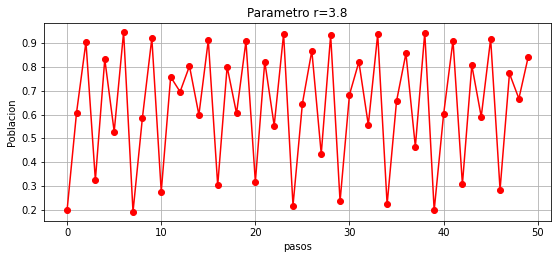

In [71]:
from matplotlib.ticker import NullFormatter
def lyap(r, x):
    xcp = x;
    acum = 0;
    der  = 0;
    (xcp,der)  = mapa(r,xcp)
    for i in range(1000):
        if (der != 0.):
            acum = acum + np.log(np.abs(der));
        (xcp,der)  = mapa(r,xcp)

    return acum/1000.


x      = 0.2 ;                           #input("Entra el valor de la poblacion inicial:     ")
r      = 3.8;                           # input("Entra el valor del parametro r:             ")
npasos = 50  ;                          #input("Entra el numero de generaciones a calcular: ")


xa=np.zeros(npasos)
xa[0]=x 
fig = go.Figure()
for i in range(0,npasos-1):
    (xa[i+1],foo) = mapa(r,xa[i]);

    (xa[i]);


plt.figure(figsize=(20,8))    
plt.subplot(221)
plt.xlabel("pasos")
plt.ylabel("Poblacion")
plt.title("Parametro r=" + str(r))
plt.grid(True)
plt.plot(xa, 'ro-')
plt.show()

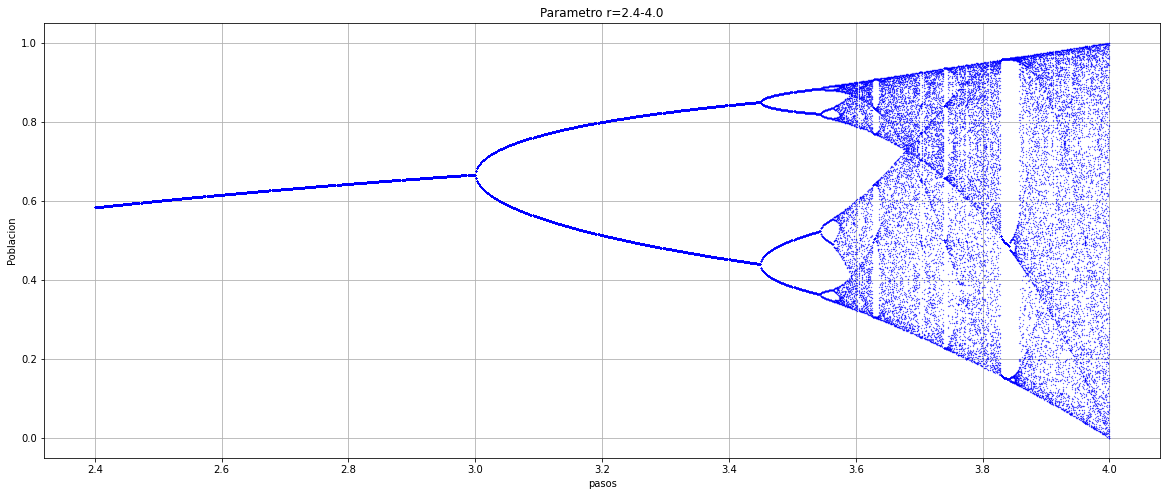

In [85]:
import numpy as np
import matplotlib.pyplot as plt

def mapa(r,x):

    der = r*(1.-2.*x)
    return r*x*(1.-x), der

def lyap(r, x):

    xcp = x
    acum = 0.
    der  = 0.
    (xcp,der)  = mapa(r,xcp)
    for i in range(100):
        if (der != 0.):
            acum = acum + np.log(np.abs(der))
        (xcp,der)  = mapa(r,xcp)

    return acum/100.


xini = 0.45565665

npasos=1000
niter=100
xa=np.zeros((npasos*niter))
r=np.zeros((npasos*niter))

r1 = 2.4     #input("Entra el valor de r min:   ")
r2 = 4     #input("Entra el valor de r max:   ")


h=(r2-r1)/(npasos-1)
for i in range(0,npasos):
    r[niter*i] = r1+i*h 
    x=xini
    for j in range(0,10000):
        (x,foo) = mapa(r[i*niter],x)
    
    xa[niter*i]=x
    for j in range(0,niter-1):
        r[i*niter+j+1] = r1+i*h
        (xa[i*niter+j+1],foo) = mapa(r[i*niter],xa[i*niter+j])

plt.figure(figsize=(20,8))           
plt.xlabel("pasos")
plt.ylabel("Poblacion")
plt.title("Parametro r=" + str(r[0]) + '-' + str(r[niter*npasos-1]))
#for i in range(0,npasos):
plt.plot(r,xa, 'b.',markersize=0.5)
plt.grid(True)
plt.show()

SyntaxError: ignored